In [ ]:
import numpy as np
import xarray as xr
import gsw
import matplotlib.pyplot as plt
from osprey.actions.forecaster import forecaster_EOF_def

In [2]:
expname = "TS01"
varname = "thetao"
ndim ="3D"
endleg = 11
yearspan = 5
yearleap = 10
varnames = ['thetao', 'so']

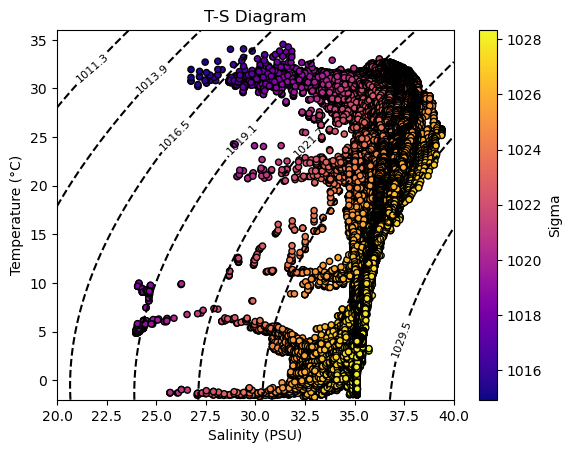

In [5]:
#from osprey.actions.reader import reader_nemo
#rdata = reader_nemo(expname='lgr3', startyear=2349, endyear=2349)
#rdata = rdata.isel(time=6)

# Define the ranges for temperature and salinity
temp_range = np.linspace(-2, 36, 100)  # Temperature in degrees Celsius
salt_range = np.linspace(20, 40, 100)   # Salinity in PSU
pres_range = np.linspace(0, 0, 100) 

# Create meshgrid for T-S space
T, S = np.meshgrid(temp_range, salt_range)

# Calculate potential density for the T-S grid at a reference pressure of 0 dbar
#density_grid = gsw.sigma0(S, T)  # sigma0 is potential density anomaly with reference to 0 dbar
density_grid = gsw.density.rho(S, T, pres_range)

# Plot 10 isolines at constant density
density_levels = np.linspace(np.nanmin(density_grid), np.nanmax(density_grid), 10)
contours = plt.contour(S, T, density_grid, levels=density_levels, colors='black', linestyles='--')
plt.clabel(contours, inline=True, fmt="%.1f", fontsize=8)

# Filter out zero values in salinity and temperature data
salinity_data = rdata['sn'].values  # Assuming salinity is in PSU
temperature_data = rdata['tn'].values # Assuming temperature is in °C
pressure = gsw.p_from_z(-rdata['nav_lev'], rdata['nav_lat'])
pressure_data = pressure.values
mask = (salinity_data != 0) & (temperature_data != 0)
filtered_salinity = salinity_data[mask]
filtered_temperature = temperature_data[mask]
filtered_pressure = filtered_temperature*0

# Calculate density for each filtered data point
#local_density = gsw.sigma0(filtered_salinity, filtered_temperature)
local_density = gsw.density.rho(filtered_salinity, filtered_temperature, filtered_pressure)

# Overlay data points colored by their local density
sc = plt.scatter(filtered_salinity, filtered_temperature, c=local_density, cmap="plasma", edgecolor='k', s=20)
colorbar_data = plt.colorbar(sc)
colorbar_data.set_label("Sigma")

# Labels and title
plt.xlabel("Salinity (PSU)")
plt.ylabel("Temperature (°C)")
plt.title("T-S Diagram")
plt.show()